이미지 인식을 위한 CNN
===
* MNIST 데이터를 통해 CNN의 이미지 인식 연습
    * MNIST 데이터셋은 70,000개의 글자 이미지에 각각 0부터 9까지 이름표를 붙인 데이터셋
## 1. 데이터 전처리

In [23]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data

In [24]:
data=load_data()#튜플
data_1,data_2=load_data()

In [25]:
(X_train,y_train),(X_test,y_test)=load_data()
X_test.shape

(10000, 28, 28)

In [26]:
X_train[0].shape

(28, 28)

In [27]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [28]:
import numpy as np
def img_show(img):
    pil_img=image.fromarray(np.uint8(img))
    pil_img.show()

* matplotlib을 통한 시각적 확인.
    * $28\times28$ 픽셀, 0~255 까지 밝기 등급으로 표현.
    * 행렬로 이루어진 하나의 집합으로 변환됨.

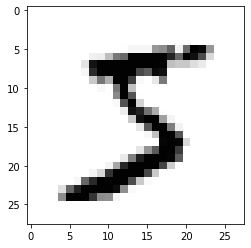

In [29]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='Greys')
plt.show()

* 주어진 가로 28, 세로 28의 2차원 배열을 784개의 1차원 배열로 바꿔 줌.
* 이를 위해 reshape() 함수를 사용.
* keras는 데이터를 0에서 1사이의 값으로 변환한 다음 구동할 때 최적의 성능을 보임.
    * 따라서 현재 0~255 사이의 값으로 이루어진 값을 0~1 사이의 값으로 바꿔야 함.
* 데이터의 폭이 클 때 적절한 값으로 분산의 정도를 바꾸는 과정 : 데이터 정규화(normalization).
    * 정규화를 위해 astype()를 이용해 실수형으로 바꾼 뒤 255로 나눠줌(min-max).

In [30]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [31]:
X_train=X_train.reshape(X_train.shape[0],784)
X_train[0].shape

(784,)

In [32]:
X_train=X_train.astype('float64')
X_train=X_train/255

In [33]:
X_test=X_test.reshape(X_test.shape[0],784).astype('float64')/255

In [34]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
print("class:%d"%(y_train[0]))

class:5


In [36]:
from tensorflow.keras.utils import to_categorical

In [37]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=10)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

* 레이블의 값은 5와 같이 이미지를 나타내는 카테고리형.
* 딥러닝의 분류 문제는 원-핫 인코딩 방식을 적용함.

In [ ]:
y_train[0]

## 2. 딥러닝 기본 프레임 만들기
* 입력 값(input_shape)이 784개, 은닉층이 512개 그리고 출력이 10개인 모델.
* 활성화 함수로 은닉층에서는 relu를, 출력층에서는 softmax를 사용.
* 딥러닝 실행 환경을 위해 오차 함수로 CategoricalCrossentropy, 최적화 함수로 adam을 사용.
* 모델의 실행에 앞서 모델의 성과를 저장하고 모델의 최적화 단계에서 학습을 자동 중단하게끔 설정.

In [38]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(512,input_dim=784,activation='relu'))
model.add(Dense(256,activation='relu'))#input_shape=(784,)
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# optimizer 는 learning rate 적절히 조절하는 것

## 3. 더 깊은 딥러닝
* 하나의 은닉층을 둔 아주 단순한 모델이지만 98%의 정확도
* 딥러닝은 이러한 기본 모델을 바탕으로, 프로젝트에 맞춰서 어떤 옵션을 더하고 어떤 층을 추가하느냐에 따라 성능이 좋아질 수 있음.
* CNN(Convolutional Neural Networ)를 추가
## 4. CNN
* 컨볼루션 신경망은 입력된 이미지에서 다시 한 번 특징을 추출하기 위해 마스크(필터, 윈도 또는 커널)를 도입하는 기법.
* 예를 입력된 이미지가 다음과 같은 값을 가지고 있다고 가정.
    * $\begin{bmatrix}1&0&1&0\\0&1&1&0\\0&0&1&1\\0&0&1&0\end{bmatrix}$
* 여기에 $2\times2$ 마스크를 준비함
    * 각 칸에는 가중치가 들어있음.
    * $\begin{bmatrix}\times1&\times0\\\times0&\times1\end{bmatrix}$
* 마스크를 이미지의 각 구간에 적용함.
    * 적용된 구간에 원래 있던 값에 가중치의 값을 곱해서 더해줌.
    * $(1\times1)+(0\times0)+(0\times0)+(1\times1)=2$
* 마스크를 한 칸씩 옮겨 모두 적용.
    * $\begin{bmatrix}2&1&1\\0&2&2\\0&1&1\end{bmatrix}$
* 이렇게 새롭게 만들어진 층을 컨볼루션(합성곱)이라고 부름.
* 컨볼루션을 만들면 입력 데이터로부터 더욱 정교한 특징을 추출할 수 있음.
* 마스크를 여러 개 만들 경우 여러 개의 컨볼루션이 만들어짐.
    * 예를 들어, $\begin{bmatrix}\times1&\times1\\\times0&\times0\end{bmatrix}\rarr\begin{bmatrix}1&1&1\\1&2&1\\0&1&2\end{bmatrix}$
### Keras의 CNN
* 케라스에서 컨볼루션 층을 추가하는 함수는 Conv2D()
```python
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
```
* 첫번째 인자 : 마스크를 몇 개 적용할 지 정함. 예시에서는 32개의 마스크를 적용.
* kernel_size : 마스크(커널)의 크기를 정함. kernel_size=(행, 열) 형식으로 정하며, 예시는 $3\times3$ 크기의 마스크를 사용하게끔 정함.
* input_shape : Dense 층과 마찬가지로 맨 처음 층에는 입력되는 값을 알려주어야 함. input_shape=(행,열, 색상 또는 흑백) 형식으로 정함. 만약 입력 이미지가 색상이면 3, 흑백이면 1.
* activation : 활성화 함수를 정의
```python
model.add(Conv2D(64, (3, 3), activation='relu'))
```
* 위와 같이 마스크 64개를 적용한 새로운 컨볼루션 층을 추가할 수 있음.
## 5. Max Pooling
* 컨볼루션 층을 통해 이미지 특징을 도출하였으나 그 결과가 여전히 크고 복잡하면 이를 다시 한 번 축소해야 함.
    * 이 과정을 풀링(pooling) 또는 서브 샘플링(sub sampling)이라고 함.
* 풀링 기법 중 가장 많이 사용되는 기법이 맥스 풀링(max pooling).
* 맥스 풀링은 정해진 구역 안에서 가장 큰 값만 다음 층으로 넘기고 나머지는 버림.
* 예를 들어 다음과 같은 이미지가 있을 때,
    * $\begin{bmatrix}1&0&1&0\\0&4&2&0\\0&1&6&1\\0&0&1&0\end{bmatrix}$
* 맥스 풀링을 적용하여 $(2\times2)$의 4개의 구간으로 나누어 가장 큰 값만을 추출.
    * $\begin{bmatrix}4&2\\1&6\end{bmatrix}$
### Keras의 MaxPooling
* 맥스 풀링을 통해 불필요한 정보를 간추릴 수 있음.
* 케라스에서는 MaxPooling2D()함수를 사용해서 다음과 같이 적용할 수 있음.
```python
model.add(MaxPooling2D(pool_size=2))
```
* 여기서 pool_size는 풀링 창의 크기를 정하는 것으로, 2로 정하면 전체 크기가 절반으로 줄어듦.
### 드롭아웃(drop out)과 플래튼(flatten)
#### 1. 드롭아웃
* 노드가 많아지거나 층이 많아진다고 해서 학습이 무조건 잘 되는 것이 아님.
    * 과적합 발생 가능.
* 과적합을 피하는 간단하지만 효과가 큰 기법이 드롭아웃 기법.
* 드롭아웃은 은닉층에 배치된 노드 중 일부를 임의로 꺼주는 것.
* 랜덤하게 노드를 끔으로써 학습 데이터에 지나치게 치우쳐서 학습되는 과적합을 방지할 수 있음.
* 케라스를 이용해 손쉽게 적용가능 / 25% 노드 끄는 코드
```python
model.add(Dropout(0.25))
```
#### 2. 플래튼
* 위의 과정을 다시 Dense() 함수를 이용해 기본층에 연결하려고 할때, 컨볼루션 층이나 맥스 풀링은 주어진 이미지를 2차원 배열인 채로 다룸.
* 이를 1차원으로 바꿔주는 함수가 Flatten() 함수.
```python
model.add(Flatten())
```
## 6. 컨볼루션 신경망 실행

In [39]:
import os
from keras.callbacks import ModelCheckpoint,EarlyStopping

MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:4f}.hdf5"
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True)
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10) #성능안나아지는걸 10번까지 참겠다 그리고 뱉겠다

history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,batch_size=200,verbose=0,callbacks=[early_stopping_callback,checkpointer])
print("\n Test Accuracy:%.4f"%(model.evaluate(X_test,y_test)[1]))


Epoch 1: val_loss improved from inf to 0.11492, saving model to ./model\01-0.114922.hdf5

Epoch 2: val_loss improved from 0.11492 to 0.09249, saving model to ./model\02-0.092492.hdf5

Epoch 3: val_loss improved from 0.09249 to 0.07643, saving model to ./model\03-0.076432.hdf5

Epoch 4: val_loss did not improve from 0.07643

Epoch 5: val_loss did not improve from 0.07643

Epoch 6: val_loss did not improve from 0.07643

Epoch 7: val_loss improved from 0.07643 to 0.07234, saving model to ./model\07-0.072342.hdf5

Epoch 8: val_loss did not improve from 0.07234

Epoch 9: val_loss did not improve from 0.07234

Epoch 10: val_loss did not improve from 0.07234

Epoch 11: val_loss did not improve from 0.07234

Epoch 12: val_loss did not improve from 0.07234

Epoch 13: val_loss did not improve from 0.07234

Epoch 14: val_loss improved from 0.07234 to 0.06945, saving model to ./model\14-0.069452.hdf5

Epoch 15: val_loss did not improve from 0.06945

Epoch 16: val_loss did not improve from 0.06945

* 14번째 에포크에서 베스트 모델을 만들었고 24번째 에포크에서 학습이 자동 중단됨.
* 위와 같이 학습의 진행에 따른 학습셋과 테스트셋의 오차 변화를 관측할 수 있음.

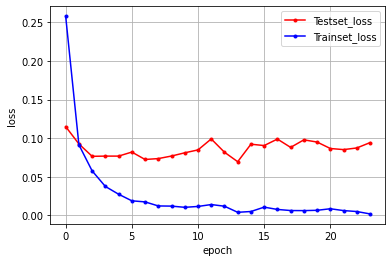

In [40]:
import matplotlib.pyplot as plt

y_vloss = history.history["val_loss"]

# 학습셋의 오차
y_loss = history.history["loss"]

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker=".", c="blue", label="Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

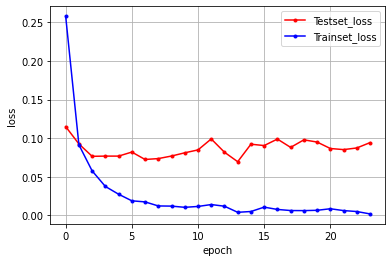

In [41]:
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [42]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

In [43]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [45]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:4f}.hdf5"
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True)
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10)

history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=30,batch_size=200,verbose=0,callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy:%.4f"%(model.evaluate(X_test,Y_test)[1]))


Epoch 1: val_loss improved from inf to 0.04521, saving model to ./model\01-0.045210.hdf5

Epoch 2: val_loss improved from 0.04521 to 0.03817, saving model to ./model\02-0.038169.hdf5

Epoch 3: val_loss improved from 0.03817 to 0.03304, saving model to ./model\03-0.033040.hdf5

Epoch 4: val_loss improved from 0.03304 to 0.02898, saving model to ./model\04-0.028979.hdf5

Epoch 5: val_loss improved from 0.02898 to 0.02766, saving model to ./model\05-0.027662.hdf5

Epoch 6: val_loss improved from 0.02766 to 0.02596, saving model to ./model\06-0.025963.hdf5

Epoch 7: val_loss improved from 0.02596 to 0.02481, saving model to ./model\07-0.024810.hdf5

Epoch 8: val_loss did not improve from 0.02481

Epoch 9: val_loss did not improve from 0.02481

Epoch 10: val_loss improved from 0.02481 to 0.02397, saving model to ./model\10-0.023969.hdf5

Epoch 11: val_loss did not improve from 0.02397

Epoch 12: val_loss did not improve from 0.02397

Epoch 13: val_loss did not improve from 0.02397

Epoch 1

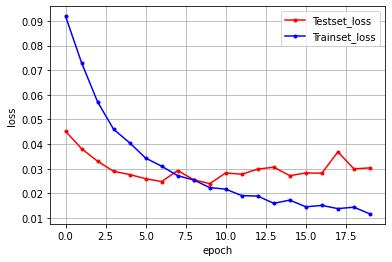

In [46]:
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [47]:
import pandas as pd
train_data=pd.read_csv('./fashion-mnist_train.csv')
test_data=pd.read_csv('./fashion-mnist_test.csv')

In [48]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
from sklearn.model_selection import train_test_split
X=train_data.iloc[:,1:]
y=train_data.iloc[:,0]
X=np.array(X)
y=np.array(y)
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=12)

# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot

In [50]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [51]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	2	0	0	0	0	95	152	120	122	113	118	137	166	201	87	0	0	0	0	4	1	0	0	0	
0	0	0	0	0	0	27	130	217	229	231	247	193	120	141	222	240	229	224	196	108	3	0	0	0	0	0	0	
0	0	3	0	11	175	223	233	225	222	219	215	222	240	238	224	222	224	223	226	232	220	154	0	0	2	0	0	
0	0	0	0	168	236	210	216	223	222	223	225	222	225	223	219	224	225	225	222	217	216	241	132	0	0	0	0	
0	0	0	7	220	217	217	221	222	221	224	225	230	218	241	245	227	226	221	222	225	221	221	199	0	0	0	0	
0	0	0	75	231	222	222	218	222	223	222	216	233	176	12	244	245	229	227	215	217	221	220	223	29	0	0	0	
0	0	0	121	233	223	230	217	219	219	219	223	225	255	74	0	195	247	237	230	213	221	220	234	83	0	0	0	
0	0	0	171	232	221	230	218	218	216	223	230	239	253	129	0	51	100	244	236	225	229	218	236	120	0	0	0	
0	0	0	211	227	221	235	216	220	224	234	235	190	85	98	96	90	57	29	202	236	231	219	233	161	0	0	0	
0	0	0	231	222	223	238	217	218	222	255	120	61	64	129	85	13	107	44	65	236	234	219	229	197	0	0	0	
0	0	0	214	221	222	244	217	216	255	150	0	118	100	106	77	35	132	82	84	

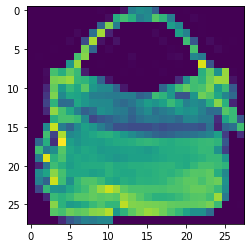

In [52]:
plt.imshow(X_train[10].reshape(28,28),cmap='viridis')
plt.show()

In [53]:
#kernel 3X3 #conv(마스크32)->pooling->dropout(0.2)->conv(마스크64)->pooling->dropout(0.2)->conv(마스크128)->Dropout(0.2)->flatten -> Dense:128->Drop(0.2)->출력층(fitting)
#model check ,earlystop
#compile,fit
#val_loss=(x_val)

In [54]:
train_data=pd.read_csv('./fashion-mnist_train.csv')
test_data=pd.read_csv('./fashion-mnist_test.csv')
X_train=train_data.iloc[:,1:]
Y_train=train_data.iloc[:,0]
X_test=test_data.iloc[:,1:]
Y_test=test_data.iloc[:,0]
X_train=np.array(X_train)
X_test=np.array(X_test)
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)
# from sklearn.model_selection import train_test_split

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))

# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(10,activation='softmax'))

In [55]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:4f}.hdf5"
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True)
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10)

history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=30,batch_size=200,verbose=0,callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy:%.4f"%(model.evaluate(X_test,Y_test)[1]))


Epoch 1: val_loss improved from inf to 0.42827, saving model to ./model\01-0.428270.hdf5

Epoch 2: val_loss improved from 0.42827 to 0.34054, saving model to ./model\02-0.340540.hdf5

Epoch 3: val_loss improved from 0.34054 to 0.30197, saving model to ./model\03-0.301972.hdf5

Epoch 4: val_loss improved from 0.30197 to 0.28273, saving model to ./model\04-0.282730.hdf5

Epoch 5: val_loss improved from 0.28273 to 0.27074, saving model to ./model\05-0.270742.hdf5

Epoch 6: val_loss improved from 0.27074 to 0.25120, saving model to ./model\06-0.251203.hdf5

Epoch 7: val_loss improved from 0.25120 to 0.23905, saving model to ./model\07-0.239050.hdf5

Epoch 8: val_loss did not improve from 0.23905

Epoch 9: val_loss improved from 0.23905 to 0.22434, saving model to ./model\09-0.224343.hdf5

Epoch 10: val_loss improved from 0.22434 to 0.22311, saving model to ./model\10-0.223106.hdf5

Epoch 11: val_loss did not improve from 0.22311

Epoch 12: val_loss improved from 0.22311 to 0.20790, saving

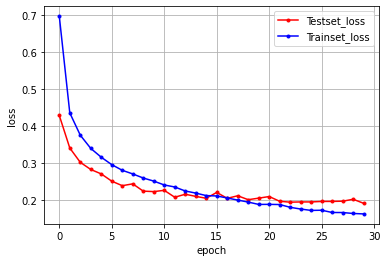

In [56]:
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()